# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Create a new dataframe from your CSV

df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [2]:
# Print out any information you need to understand your dataframe

print("Column Names")
print(df.columns)

print("")
print("Diminsions of the Data")
print(df.shape)

print("")
print("Data Types of each Column")
print(df.dtypes)

Column Names
Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

Diminsions of the Data
(23486, 11)

Data Types of each Column
Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object


In [3]:
print("Numerical Columns")
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

print("")
print("Non-Numerical Columns")

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

Numerical Columns
['Unnamed: 0' 'Clothing ID' 'Age' 'Rating' 'Recommended IND'
 'Positive Feedback Count']

Non-Numerical Columns
['Title' 'Review Text' 'Division Name' 'Department Name' 'Class Name']


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

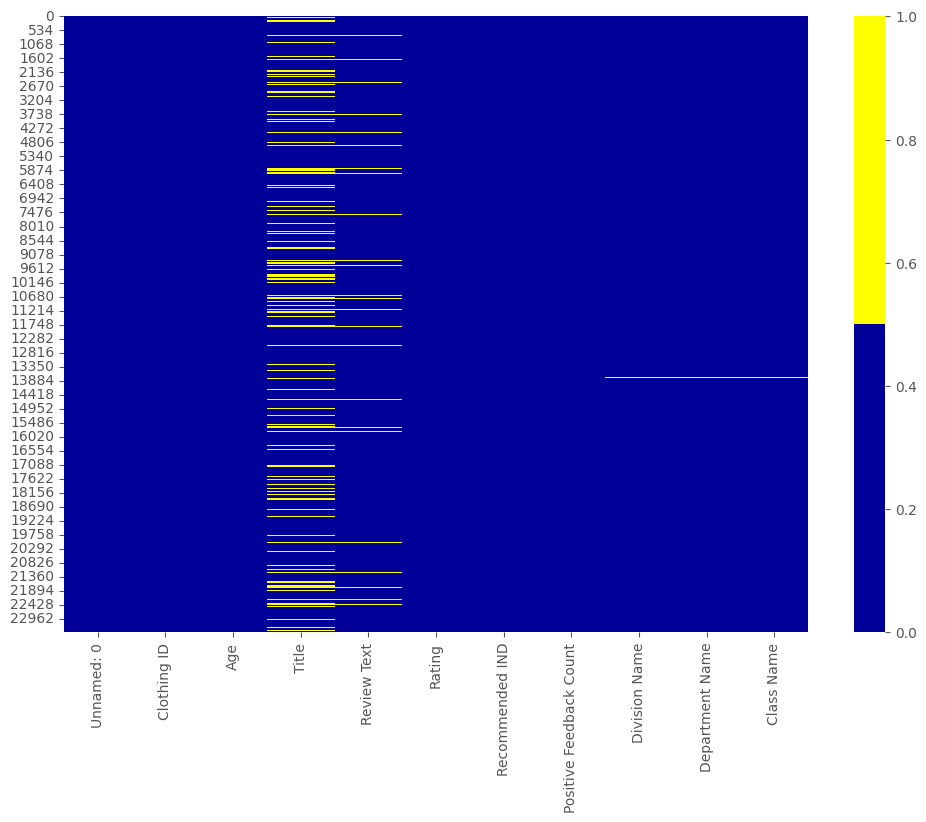

In [4]:
# Plot a heatmap of any missing data

cols = df.columns[:11] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [5]:
# Try out a missing data percentage list! 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Clothing ID - 0%
Age - 0%
Title - 16%
Review Text - 4%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%


created missing indicator for: Title
created missing indicator for: Review Text
created missing indicator for: Division Name
created missing indicator for: Department Name
created missing indicator for: Class Name


<AxesSubplot:xlabel='index'>

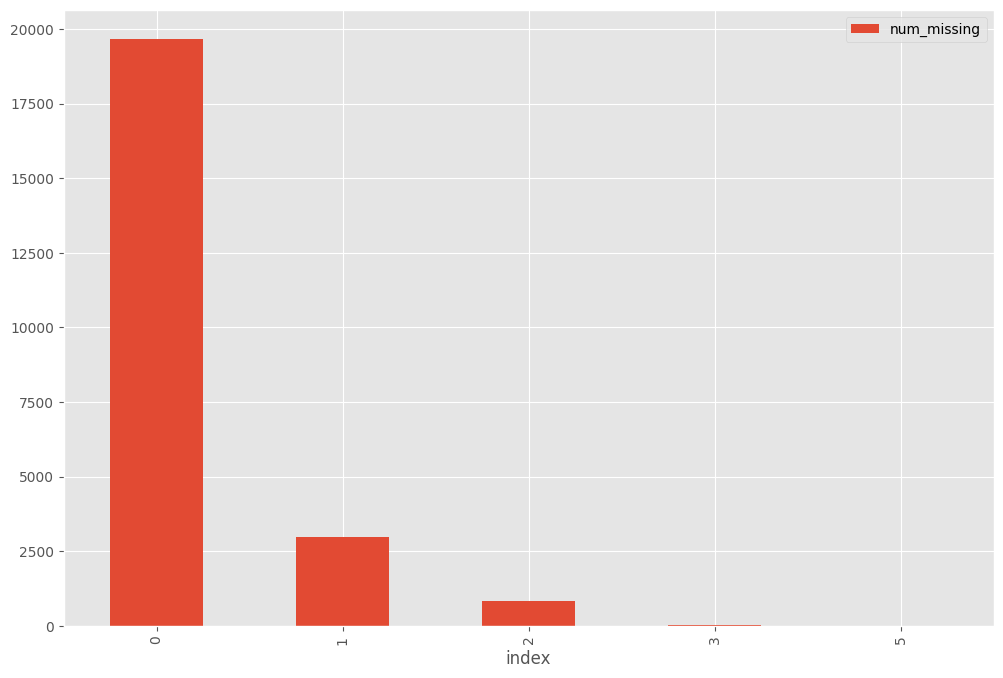

In [6]:
# Plot a missing data histogram

for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

Unnamed: 0 - 0%
Clothing ID - 0%
Age - 0%
Title - 0%
Review Text - 0%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%
Title_ismissing - 0%
Review Text_ismissing - 0%
Division Name_ismissing - 0%
Department Name_ismissing - 0%
Class Name_ismissing - 0%
num_missing - 0%


<AxesSubplot:>

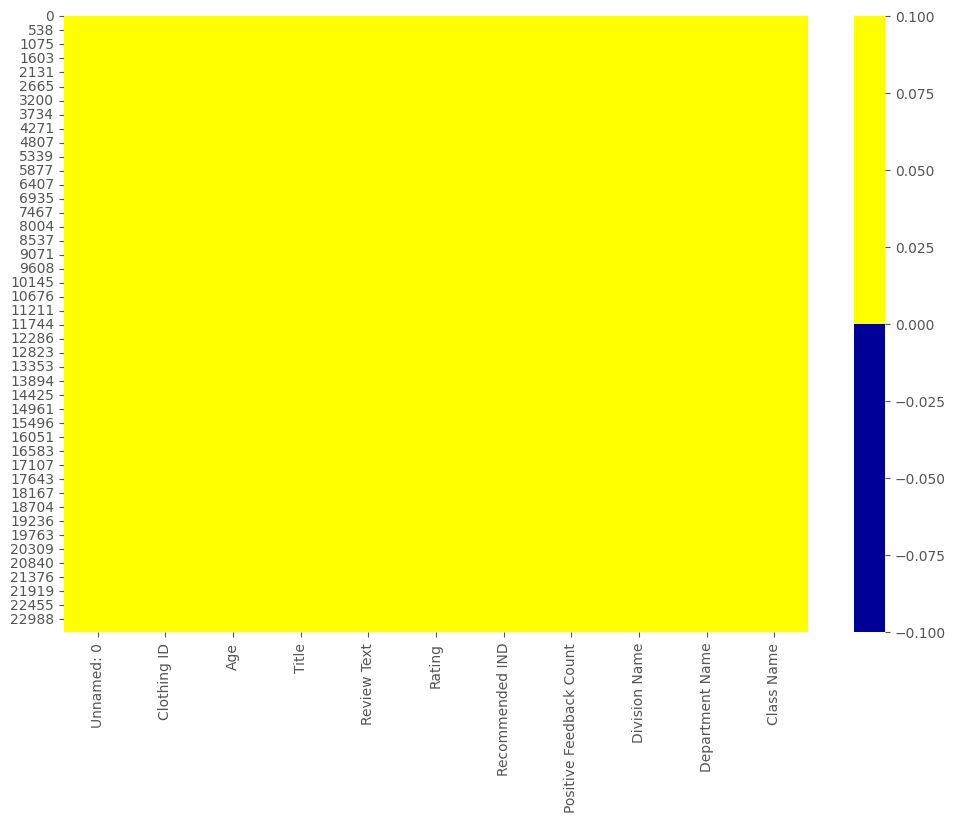

In [7]:
# Handle any missing data in your dataframe.

df['Title'] = df['Title'].fillna('_Blank_')

df.dropna(inplace=True)

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    
cols = df.columns[:11] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot:>

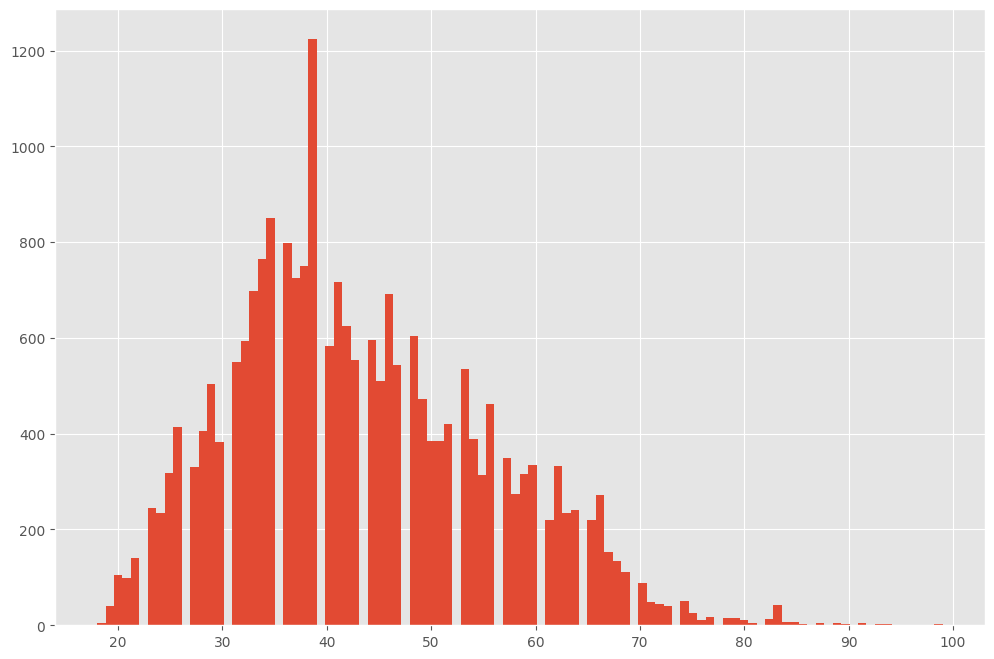

In [8]:
# Plot a histogram to see if there are any outliers.

df['Age'].hist(bins=100)


<AxesSubplot:>

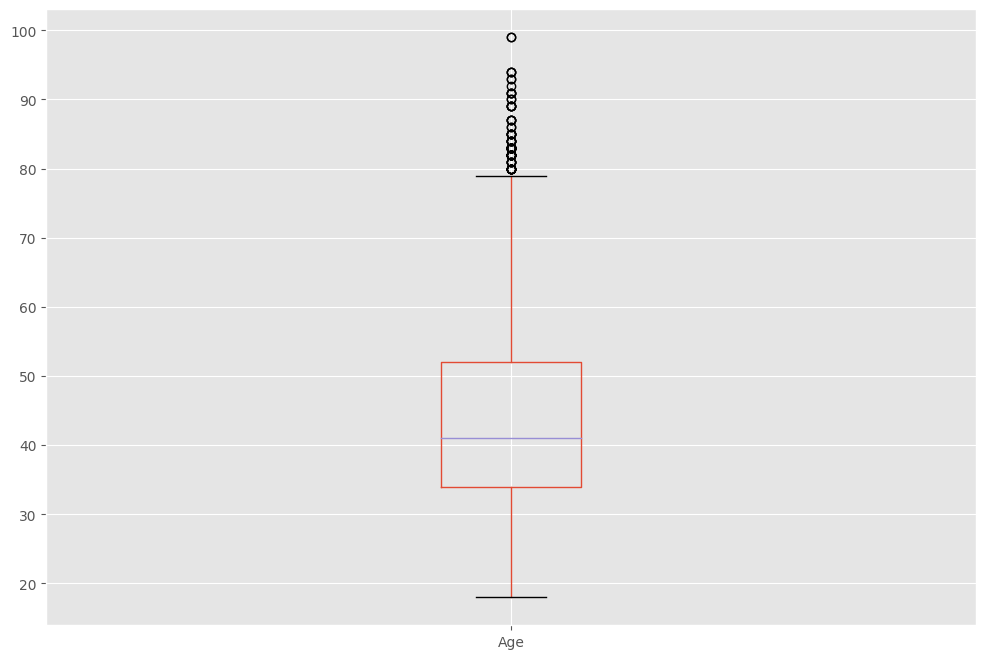

In [9]:
df.boxplot(column=['Age'])

In [10]:
# Use the describe() method

df['Age'].describe()

count    22628.000000
mean        43.282880
std         12.328176
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

<AxesSubplot:>

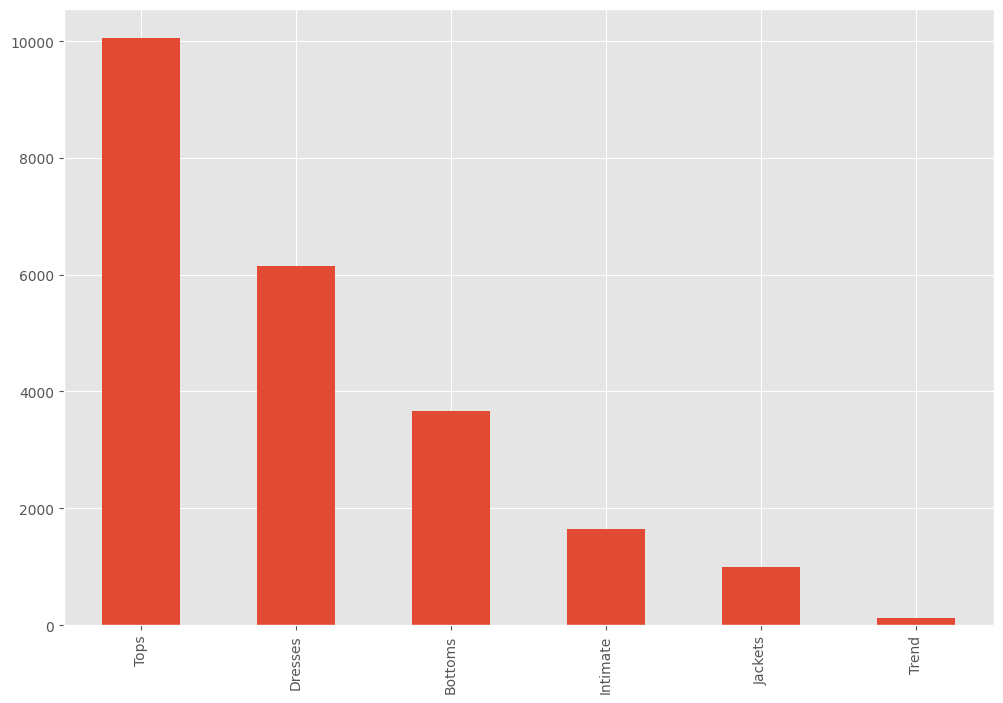

In [11]:
# Plot a bar chart

df['Department Name'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [12]:
# Handle any outliers in your dataframe

df.nlargest(15,'Age')

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title_ismissing,Review Text_ismissing,Division Name_ismissing,Department Name_ismissing,Class Name_ismissing,num_missing
8327,8327,1078,99,Beachy and boho!,I love the weight of the material; sometimes c...,5,1,1,General,Dresses,Dresses,False,False,False,False,False,0
11545,11545,949,99,_Blank_,"Great quality, i didn't expect the neck to be ...",4,1,4,General,Tops,Sweaters,True,False,False,False,False,1
6543,6543,1095,94,_Blank_,Flattering! i love how it looks like a maxi dr...,4,1,0,General,Dresses,Dresses,True,False,False,False,False,1
18036,18036,1094,94,_Blank_,Dress just did not fit will around the hips. ...,1,0,0,General,Dresses,Dresses,True,False,False,False,False,1
18563,18563,1094,94,Great dress!,"This dress is very comfortable, not itchy at a...",5,1,1,General,Dresses,Dresses,False,False,False,False,False,0
659,659,252,93,Amazing suit!,"This is by far the cutest, most glamorous one ...",5,1,3,Initmates,Intimate,Swim,False,False,False,False,False,0
17578,17578,901,93,Very pretty & soft,Great quality. very versatile design and super...,4,1,0,General,Tops,Fine gauge,False,False,False,False,False,0
14997,14997,1025,92,The only jeans you'll ever wear!,It's hard to tell how jeans will fit when shop...,5,1,2,General,Bottoms,Jeans,False,False,False,False,False,0
9513,9513,871,91,_Blank_,"From the website picture (in particular, the g...",5,1,15,General,Tops,Knits,True,False,False,False,False,1
10617,10617,1028,91,Pajama jeans,"I love the coh fleetwood jeans, and since i wa...",2,0,3,General,Bottoms,Jeans,False,False,False,False,False,0


In [13]:
df = df.drop(df[df['Age'] >= 90].index, inplace = True)

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [16]:
# Look for any irrelevant data in the dataframe. How will you handle it?

df.drop(['Unnamed: 0','Clothing ID'],axis=1, inplace = True)

AttributeError: 'NoneType' object has no attribute 'drop'

In [ ]:
# Look for duplicates. How will you handle any duplicates?

In [ ]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [ ]:
# Try to convert all the strings in a column to lower or upper case. 